In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 3.8MB 56.2MB/s 
     |████████████████████████████████| 450kB 45.9MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=946d04f71619b5aa15c2a0bc2617488d841c7a01ff1d528ae56a7a823298c867
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tenso

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [4]:
# convert tensor into numpy array
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [5]:
# show the data type and shape of the variable
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


In [6]:
# create tensors with 1s and 0s of specified shape
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [7]:
# create tensor with random values of specified shape
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[-0.274194  ,  1.068036  ],
       [ 0.00792912, -0.22350968]], dtype=float32)>

In [ ]:
# create tensor with random values with uniform distribution
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=1652823, shape=(2, 2), dtype=int32, numpy=
array([[4, 7],
       [0, 1]], dtype=int32)>

In [8]:
# create tensor with random values with normal distribution
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.3048127 ,  0.08724653],
       [-0.0284172 ,  0.08820359]], dtype=float32)>


In [ ]:
# assign a new value to the existing tensor
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [ ]:
# a different add function 
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]

In [10]:
# add, square, exponential tensors
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

In [11]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  # record the operations on a
  tape.watch(a)  
  
  # perform maths operations 
  c = tf.sqrt(tf.square(a) + tf.square(b))  

  # calculate gradient of c wrt to a
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.8262655   0.99991685]
 [ 0.49804905 -0.99449784]], shape=(2, 2), dtype=float32)


In [12]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.8262655   0.99991685]
 [ 0.49804905 -0.99449784]], shape=(2, 2), dtype=float32)


In [13]:
with tf.GradientTape() as outer_tape:
  # calculate higher order derivatives, use nest gradient tapes
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[2.8776586e-01 7.4863434e-05]
 [9.6144497e-01 9.0358257e-03]], shape=(2, 2), dtype=float32)


In [14]:
# linear regression using gradient tape
input_dim = 2
output_dim = 1
learning_rate = 0.01

# define the weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# define the bias matrix
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  # matrix multiplication
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  # calculate mean square loss of the actual and predicted values
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    # get predictions
    predictions = compute_predictions(x)

    # calculate loss 
    loss = compute_loss(y, predictions)

    # calculate loss with respect to weight and bias
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

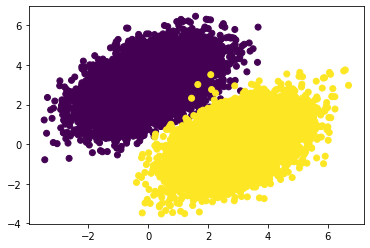

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000

# generate sample data for testing 
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [16]:
# randomise the data
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# create batches of the data 
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# train the batch data on the model 
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0634
Epoch 1: last batch loss = 0.0618
Epoch 2: last batch loss = 0.0321
Epoch 3: last batch loss = 0.0281
Epoch 4: last batch loss = 0.0393
Epoch 5: last batch loss = 0.0269
Epoch 6: last batch loss = 0.0168
Epoch 7: last batch loss = 0.0251
Epoch 8: last batch loss = 0.0241
Epoch 9: last batch loss = 0.0246


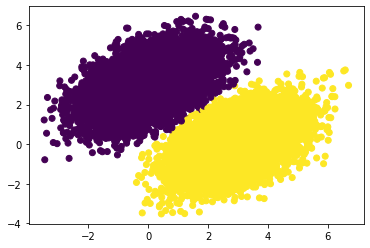

In [17]:
# plot the predictions in a plot 
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

In [18]:
# calculate the time to execute the code 
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))


Time per epoch: 0.117 s


In [19]:
# tf.function uses static graph. this improves the execution time 
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [20]:
# execution time after static graph 
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.073 s
